In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle

## Load Dataset

In [166]:
df = pd.read_csv("Autism_2018.csv")

In [167]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

## Check Missing Value

In [169]:
df.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [170]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


## Preprocessing Data

### Drop Unused Columns

In [171]:
df.drop(['Case_No'], axis=1, inplace=True)

# drop kolom Qchat-10-score (karena merupakan summarize A1-A10 )**
df.drop(['Qchat-10-Score'], axis=1, inplace=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,family member,Yes


In [172]:
print(df['Ethnicity'].unique())

['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']


In [173]:
# Replace south asian as asian
df.replace('south asian', 'asian', inplace=True)

# Select only Asian Ethnic, then drop Ethnicity columns
df_asian = df.loc[df['Ethnicity'] == 'asian']
df_asian = df_asian.drop(['Ethnicity'], axis=1)
df_asian.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
6,1,0,0,1,1,1,0,0,1,0,33,m,yes,no,family member,Yes
7,0,1,0,0,1,0,1,1,1,1,33,m,yes,no,family member,Yes
8,0,0,0,0,0,0,1,0,0,1,36,m,no,no,family member,No
9,1,1,1,0,1,1,0,1,1,1,22,m,no,no,Health Care Professional,Yes
45,0,0,0,0,0,0,1,0,0,1,19,m,no,no,family member,No


### Checking Inconsistent categorical values

In [174]:
cat_columns = list(df_asian.columns[11:15])
for col in cat_columns:
    print(f"""{col} : {df_asian[col].unique()}""")

Sex : ['m' 'f']
Jaundice : ['yes' 'no']
Family_mem_with_ASD : ['no' 'yes']
Who completed the test : ['family member' 'Health Care Professional' 'Health care professional']


In [175]:
# Sex column
df_asian['Sex'].replace('m', 'male', inplace= True)
df_asian['Sex'].replace('f', 'female', inplace= True)

In [176]:
# Who_com_the_test columns
df_asian['Who completed the test'].replace('Health care professional', 'health care professional', inplace=True)
df_asian['Who completed the test'].replace('Health Care Professional', 'health care professional', inplace=True)

In [177]:
for col in cat_columns:
    print(f"""{col} : {df_asian[col].unique()}""")

Sex : ['male' 'female']
Jaundice : ['yes' 'no']
Family_mem_with_ASD : ['no' 'yes']
Who completed the test : ['family member' 'health care professional']


### Handling Categorical Values

In [178]:
# Features Encoding (One-Hot-Encoder)
df_asian = pd.get_dummies(data=df_asian, columns=cat_columns)
df_asian.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
6,1,0,0,1,1,1,0,0,1,0,33,Yes,0,1,0,1,1,0,1,0
7,0,1,0,0,1,0,1,1,1,1,33,Yes,0,1,0,1,1,0,1,0
8,0,0,0,0,0,0,1,0,0,1,36,No,0,1,1,0,1,0,1,0
9,1,1,1,0,1,1,0,1,1,1,22,Yes,0,1,1,0,1,0,0,1
45,0,0,0,0,0,0,1,0,0,1,19,No,0,1,1,0,1,0,1,0


In [179]:
# Label Encoding (Label Encoder)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [180]:
df_asian['Class/ASD Traits '] = le.fit_transform(df_asian['Class/ASD Traits '])
df_asian.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
6,1,0,0,1,1,1,0,0,1,0,33,1,0,1,0,1,1,0,1,0
7,0,1,0,0,1,0,1,1,1,1,33,1,0,1,0,1,1,0,1,0
8,0,0,0,0,0,0,1,0,0,1,36,0,0,1,1,0,1,0,1,0
9,1,1,1,0,1,1,0,1,1,1,22,1,0,1,1,0,1,0,0,1
45,0,0,0,0,0,0,1,0,0,1,19,0,0,1,1,0,1,0,1,0
56,1,0,0,0,0,1,1,0,1,1,32,1,1,0,1,0,1,0,1,0
57,0,0,0,1,1,1,1,1,1,0,25,1,0,1,1,0,1,0,1,0
68,1,0,1,0,0,0,0,0,0,0,23,0,0,1,1,0,0,1,1,0
69,1,0,1,1,1,1,1,0,1,1,18,1,1,0,0,1,0,1,1,0
71,0,0,1,1,1,1,1,0,1,1,34,1,0,1,1,0,1,0,1,0


### Handling Numerical Values (Min-Max Scaler)

In [181]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

In [182]:
# save mx scaler for future predict data
new_scaler = mx.fit(df_asian[['Age_Mons']])
with open ('mx_scaler.pkl', 'wb') as mx_scl:
    pickle.dump(new_scaler, mx_scl)

In [183]:
# new_scale = pd.DataFrame({
#     'data1' : [19, 22, 33, 36, 9],
#     'data2' : [3, 4, 12, 36, 2]
# })

# with open ('mx_scaler.pkl', 'rb') as mx_load:
#     mx_scaler = pickle.load(mx_load)
#     d = mx_scaler.transform(new_scale[['data1']])
# d

In [184]:
df_asian['Age_Mons'] = mx.fit_transform(df_asian[['Age_Mons']])
df_asian.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
6,1,0,0,1,1,1,0,0,1,0,0.875000,1,0,1,0,1,1,0,1,0
7,0,1,0,0,1,0,1,1,1,1,0.875000,1,0,1,0,1,1,0,1,0
8,0,0,0,0,0,0,1,0,0,1,1.000000,0,0,1,1,0,1,0,1,0
9,1,1,1,0,1,1,0,1,1,1,0.416667,1,0,1,1,0,1,0,0,1
45,0,0,0,0,0,0,1,0,0,1,0.291667,0,0,1,1,0,1,0,1,0
56,1,0,0,0,0,1,1,0,1,1,0.833333,1,1,0,1,0,1,0,1,0
57,0,0,0,1,1,1,1,1,1,0,0.541667,1,0,1,1,0,1,0,1,0
68,1,0,1,0,0,0,0,0,0,0,0.458333,0,0,1,1,0,0,1,1,0
69,1,0,1,1,1,1,1,0,1,1,0.250000,1,1,0,0,1,0,1,1,0
71,0,0,1,1,1,1,1,0,1,1,0.916667,1,0,1,1,0,1,0,1,0


## Feature Selection

In [185]:
# reset index
df_asian.reset_index(inplace=True)
df_asian.drop(['index'], axis=1, inplace=True)

In [186]:
df_asian.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex_female,Sex_male,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes,Who completed the test_family member,Who completed the test_health care professional
0,1,0,0,1,1,1,0,0,1,0,0.875000,1,0,1,0,1,1,0,1,0
1,0,1,0,0,1,0,1,1,1,1,0.875000,1,0,1,0,1,1,0,1,0
2,0,0,0,0,0,0,1,0,0,1,1.000000,0,0,1,1,0,1,0,1,0
3,1,1,1,0,1,1,0,1,1,1,0.416667,1,0,1,1,0,1,0,0,1
4,0,0,0,0,0,0,1,0,0,1,0.291667,0,0,1,1,0,1,0,1,0


In [187]:
feature = df_asian.drop('Class/ASD Traits ', axis=1)
label = df_asian['Class/ASD Traits ']

In [188]:
corr = df_asian.corr()
feature_corr = abs(corr['Class/ASD Traits ']).sort_values(ascending=False)
feature_corr

Class/ASD Traits                                   1.000000
A5                                                 0.575094
A9                                                 0.557747
A6                                                 0.477838
A7                                                 0.430758
A8                                                 0.427589
A1                                                 0.421934
A4                                                 0.404027
A2                                                 0.400207
A3                                                 0.266507
Family_mem_with_ASD_yes                            0.179284
Family_mem_with_ASD_no                             0.179284
A10                                                0.148747
Jaundice_yes                                       0.041204
Jaundice_no                                        0.041204
Sex_female                                         0.031768
Sex_male                                

## Dimensional Reduction with PCA & Create 10 Validation Data

In [189]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ss_scaler = StandardScaler()
pca = PCA(n_components=2)

# reduce features to 2 features
x_pca = pca.fit_transform(feature)
x_pca = ss_scaler.fit_transform(x_pca)

In [190]:
# Create 10 validation data from dataset
val_size = 30
x_validation = x_pca[-val_size:]
x_pca = x_pca[0:-val_size]

y_validation = label[-val_size:]
y_pca = label[0:-val_size]

## Splitting Data & Train Model

In [191]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.4, random_state=20)
print(f"""
x_train = {len(X_train)}
x_test = {len(X_test)}
""")


x_train = 215
x_test = 144



## Viz hyperplane

In [192]:
xtr, xts, ytr, yts = train_test_split(x_pca, y_pca, test_size=0.4, random_state=20)
print(f"""
x_train = {len(xtr)}
x_test = {len(xts)}
""")


x_train = 197
x_test = 132



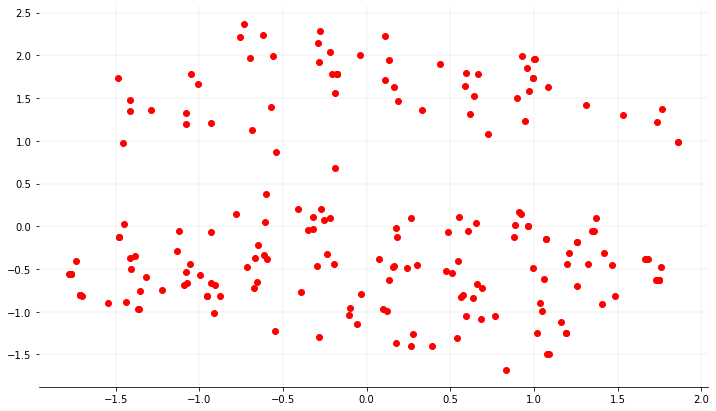

In [193]:
## viz hyperplane
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(xtr[:,0], xtr[:,1], color='red')
plt.show()

In [194]:
model_pca = svm.SVC(kernel='linear', C=1)
model_pca.fit(xtr,ytr)
model_pca.score(xts, yts)

0.9545454545454546

In [196]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

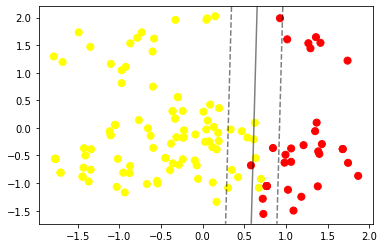

In [197]:
plt.scatter(xts[:, 0], xts[:, 1], c=yts, s=50, cmap='autumn')
plot_svc_decision_function(model_pca)

In [32]:
from sklearn.metrics import confusion_matrix
y_pred = model_pca.predict(xts)
cm = confusion_matrix(yts, y_pred)
cm

array([[32,  1],
       [ 2, 97]], dtype=int64)

In [33]:
y_pred = model_pca.predict(x_validation)

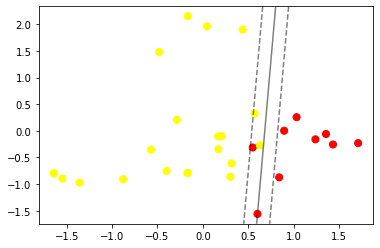

In [34]:
plt.scatter(x_validation[:, 0], x_validation[:, 1], c=y_validation, s=50, cmap='autumn')
plot_svc_decision_function(model_pca)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validation, y_pred)
cm

array([[ 7,  2],
       [ 0, 21]], dtype=int64)

In [36]:
model_pca.score(x_validation,y_validation)

0.9333333333333333

## K-Fold Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score
svc_cross = svm.SVC(kernel='linear', C=10000)

scores = cross_val_score(svc_cross, x_pca, y_pca, cv=4)
scores

array([0.98795181, 0.96341463, 0.91463415, 0.97560976])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

## Evaluate Model

In [ ]:
svm_score = model_pca.score(xts, yts)
print('Model accuracy : ', svm_score)

In [ ]:
y_pred = model_pca.predict(xts)

In [ ]:
cm = confusion_matrix(yts,y_pred)
cm

In [ ]:
recall = cm[0][0]/(cm[0][0]+cm[1][0])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print(f"""
recall = {recall}
precision = {precision}
accuracy = {accuracy}
f-measure = {2*recall*precision/(recall+precision)}
""")

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Save Model

In [ ]:
import pickle

In [ ]:
with open('svm_autism.pkl', 'wb') as save:
    pickle.dump(model_pca, save)

In [ ]:
with open('svm_autism.pkl', 'rb') as load:
    svm_load = pickle.load(load)

In [ ]:
print(f'Model Accuracy : ', svm_load.score(xts, yts))